<a href="https://colab.research.google.com/github/Santhiya-2207/task1-guvi-ds-email/blob/main/Python_notebook_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [ ]:
data = pd.read_csv('diabetes.csv')

**DATA ANALYSING AND DATA CLEANING**

In [ ]:
data.shape

(768, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
data.tail(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
748,3,187,70,22,200,36.4,0.408,36,1
749,6,162,62,0,0,24.3,0.178,50,1
750,4,136,70,0,0,31.2,1.182,22,1
751,1,121,78,39,74,39.0,0.261,28,0
752,3,108,62,24,0,26.0,0.223,25,0
753,0,181,88,44,510,43.3,0.222,26,1
754,8,154,78,32,0,32.4,0.443,45,1
755,1,128,88,39,110,36.5,1.057,37,1
756,7,137,90,41,0,32.0,0.391,39,0
757,0,123,72,0,0,36.3,0.258,52,1


In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Zero in Glucose, blood pressure, skin thickness, age are meaningless, it refers to null value only . So finding null value replacing 0 with Nan
data[['Glucose','BloodPressure','SkinThickness','BMI','Age']] = data[['Glucose','BloodPressure','SkinThickness','BMI','Age']].replace(0,np.nan)

In [ ]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                       0
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
data.isnull().sum()/len(df) * 100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                      0.000000
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

In [ ]:
#replace null values with mean
df = data.copy()
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

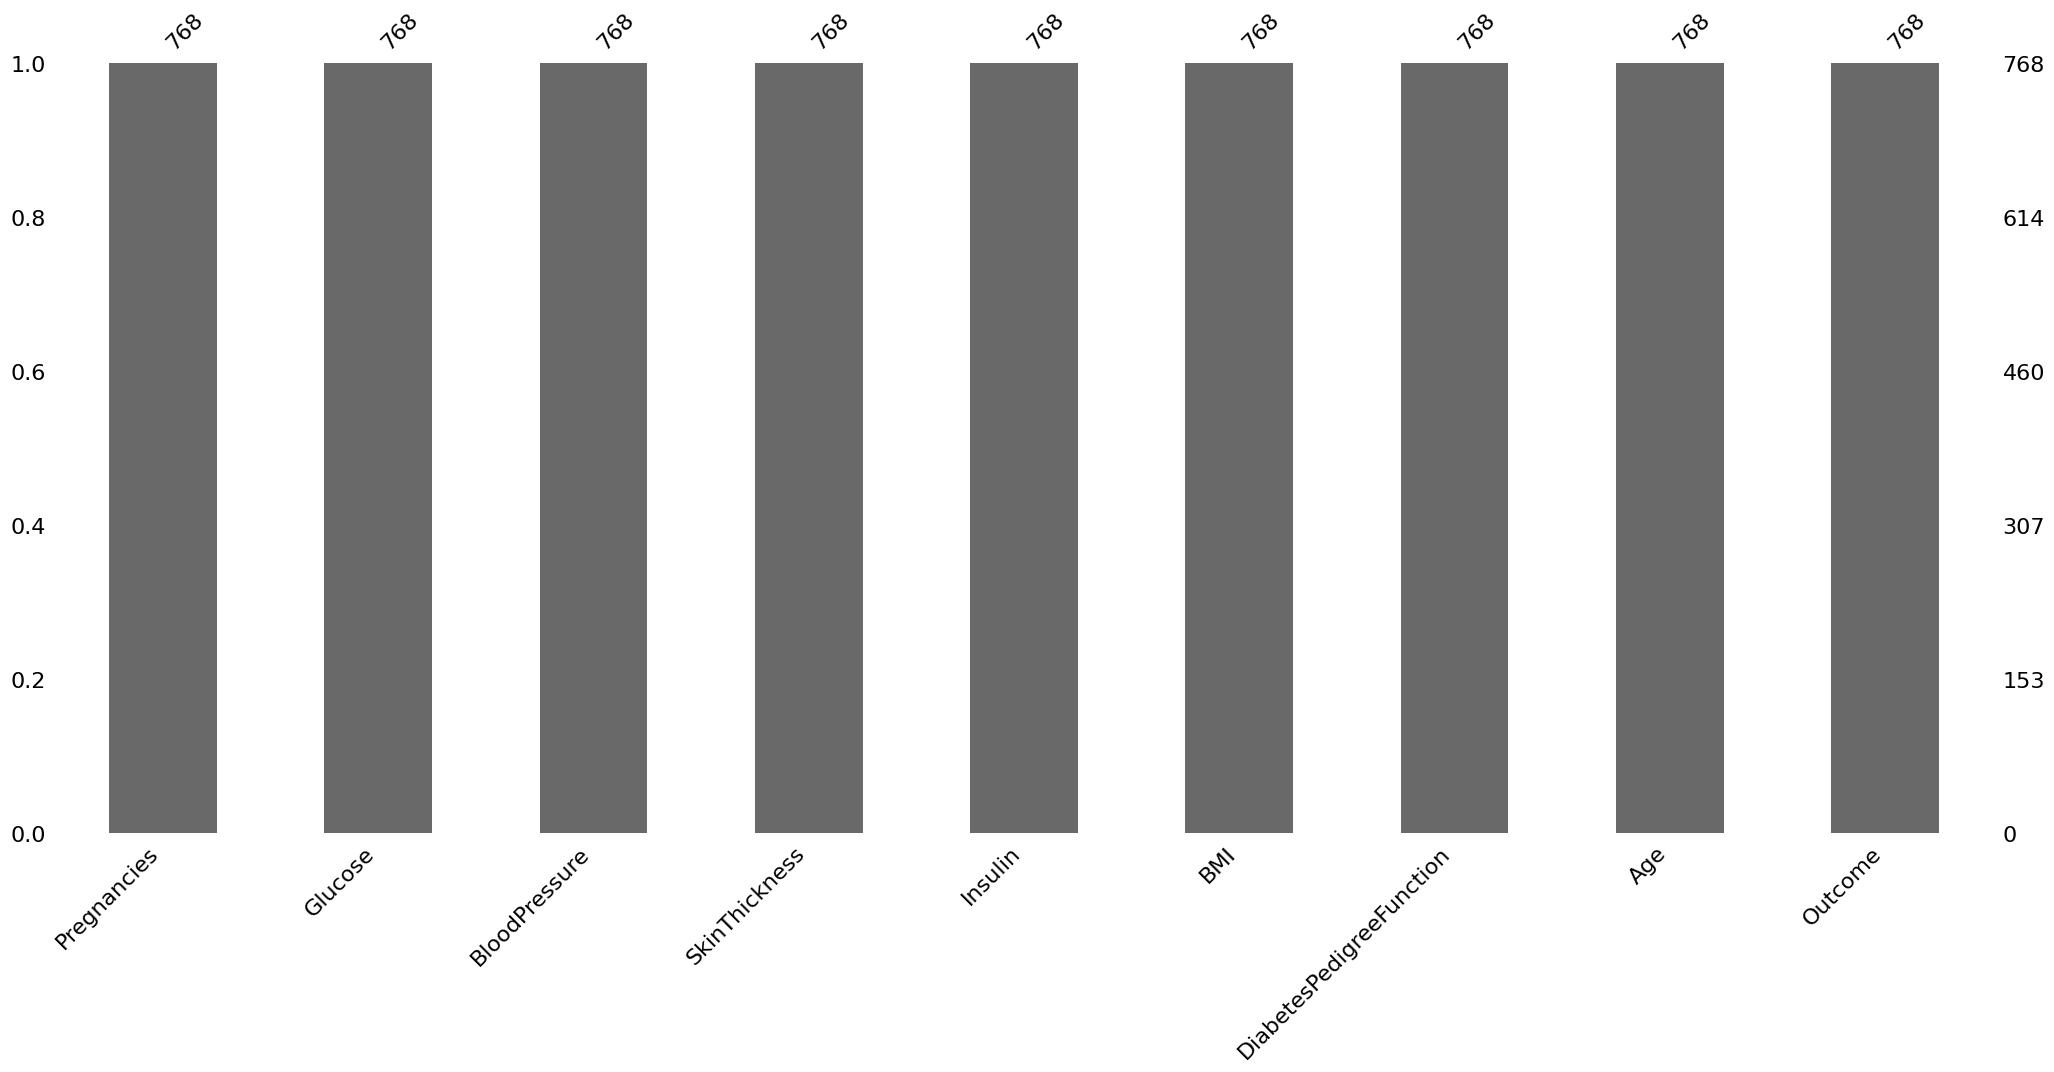

In [ ]:
# confirming Zero null values by Visualization
msno.bar(df)

**EXPLORATARY DATA ANALYSIS**

<Axes: >

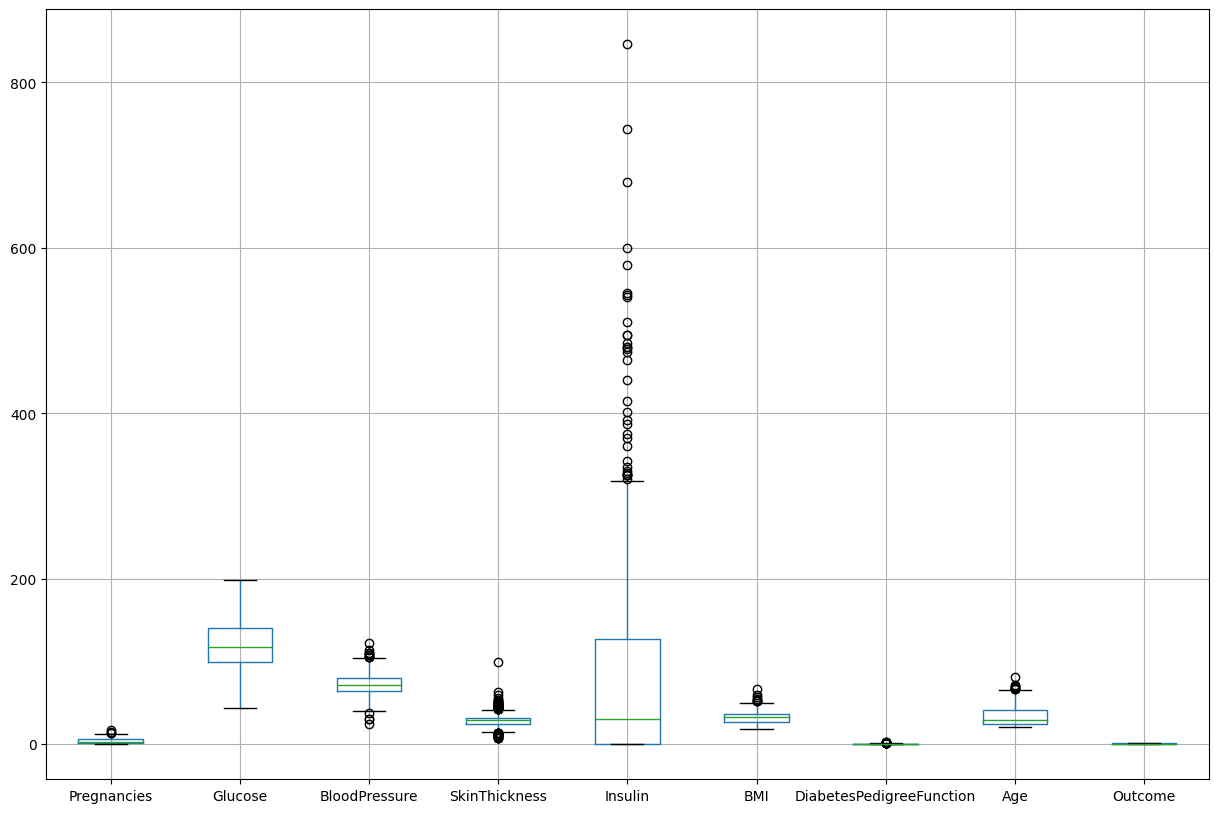

In [ ]:
# Finding outliers
df.boxplot(figsize = (15,10))

In [ ]:
# removing outliers using IQR

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR  = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR


In [ ]:
df = np.where(df > upper_limit,upper_limit,np.where(df < lower_limit,lower_limit,df))

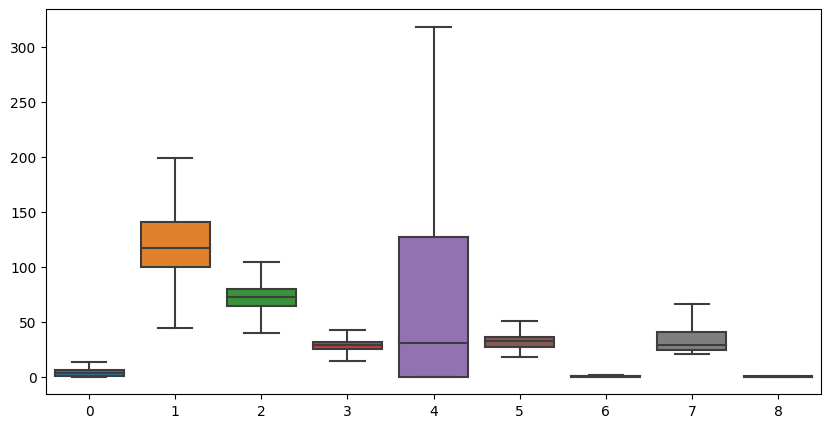

In [ ]:
#after removing outliers
sns.boxplot(df)
plt.rcParams['figure.figsize'] = (15,10)

In [ ]:
df = pd.DataFrame(df,columns =['Pregnancies','Glucose','BloodPressure','SkinThickness',' insulin','BMI','DiabetesPedigreeFunction', 'Age','Outcome'])

**Data Visualization**

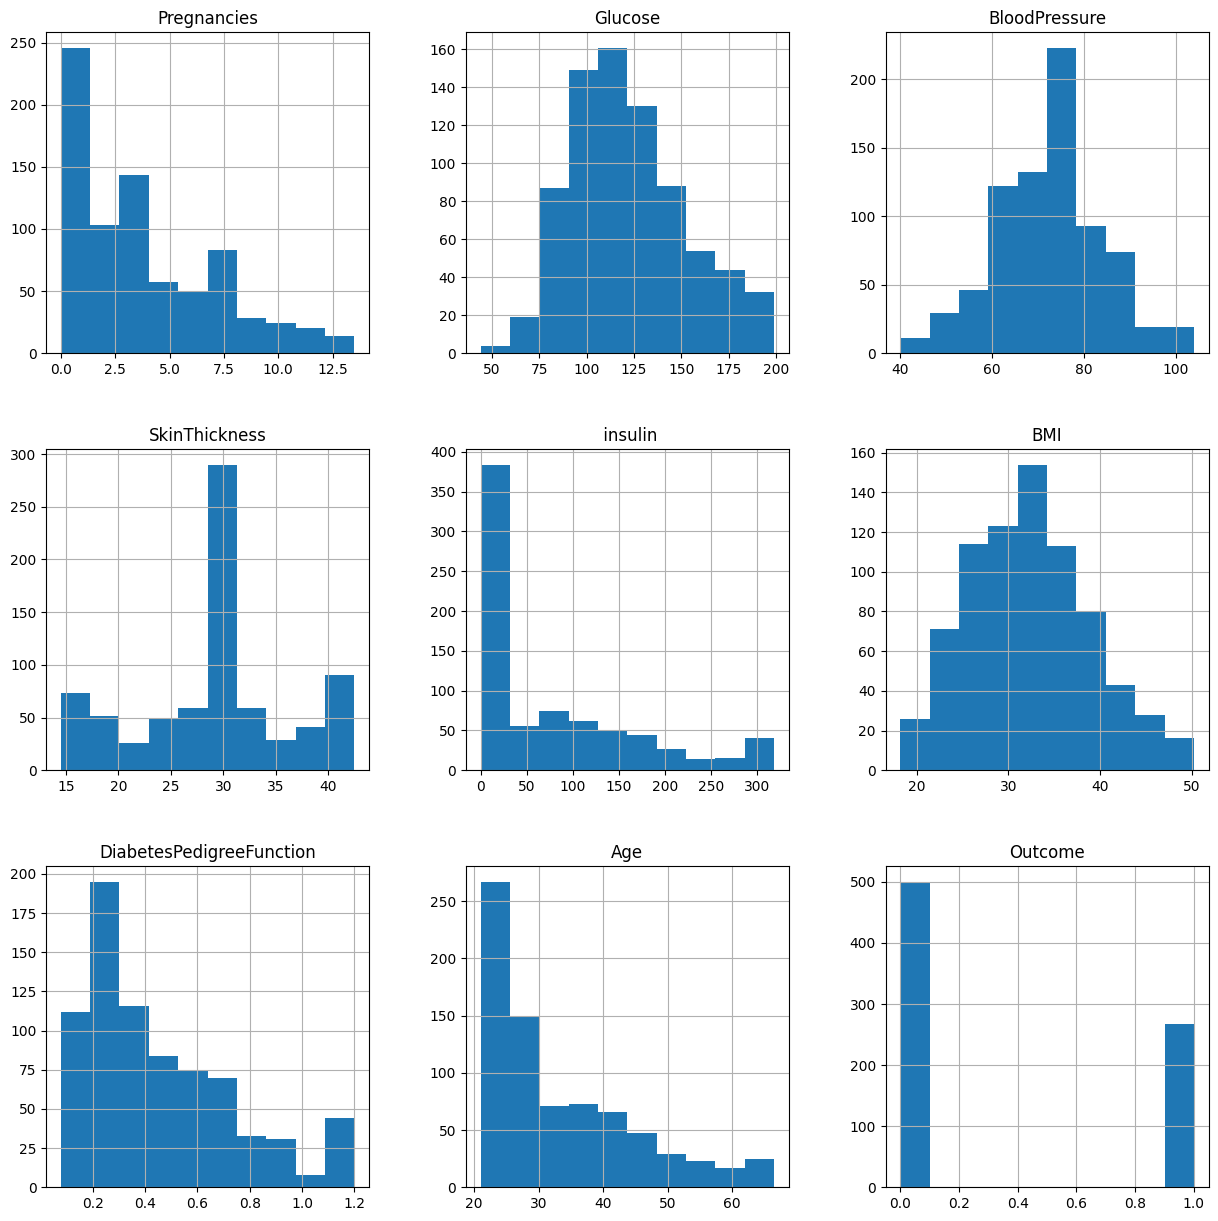

In [ ]:
#data visualization of cleaned data
Hist_plt = df.hist(figsize = (15,15))

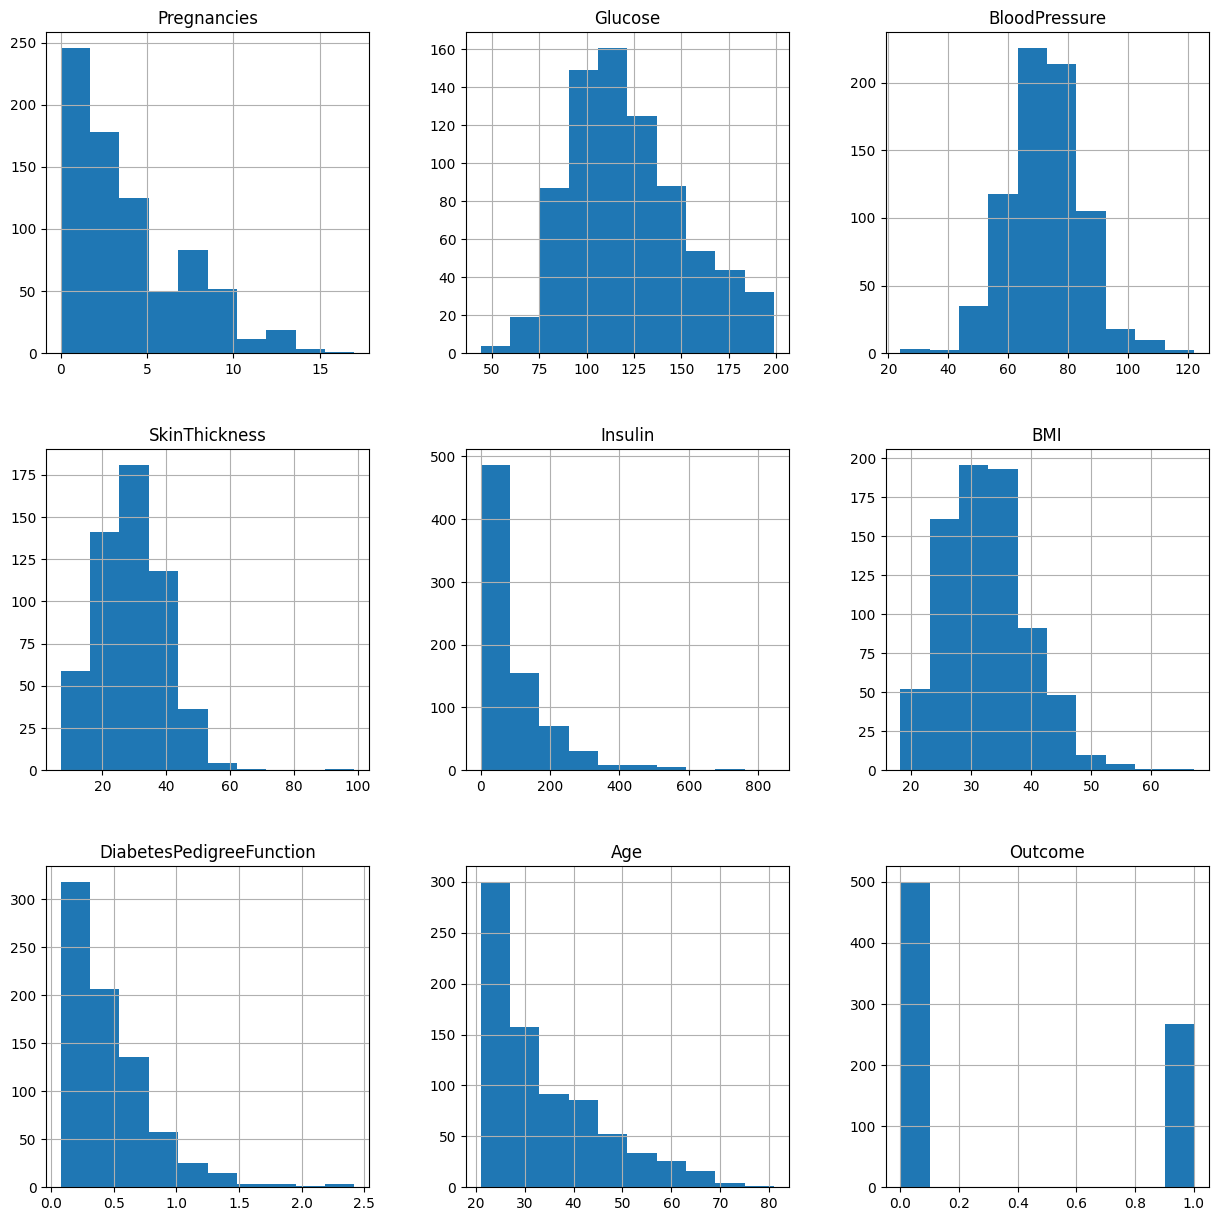

In [ ]:
#data visualization for uncleaned data
Hist = data.hist(figsize = (15,15))

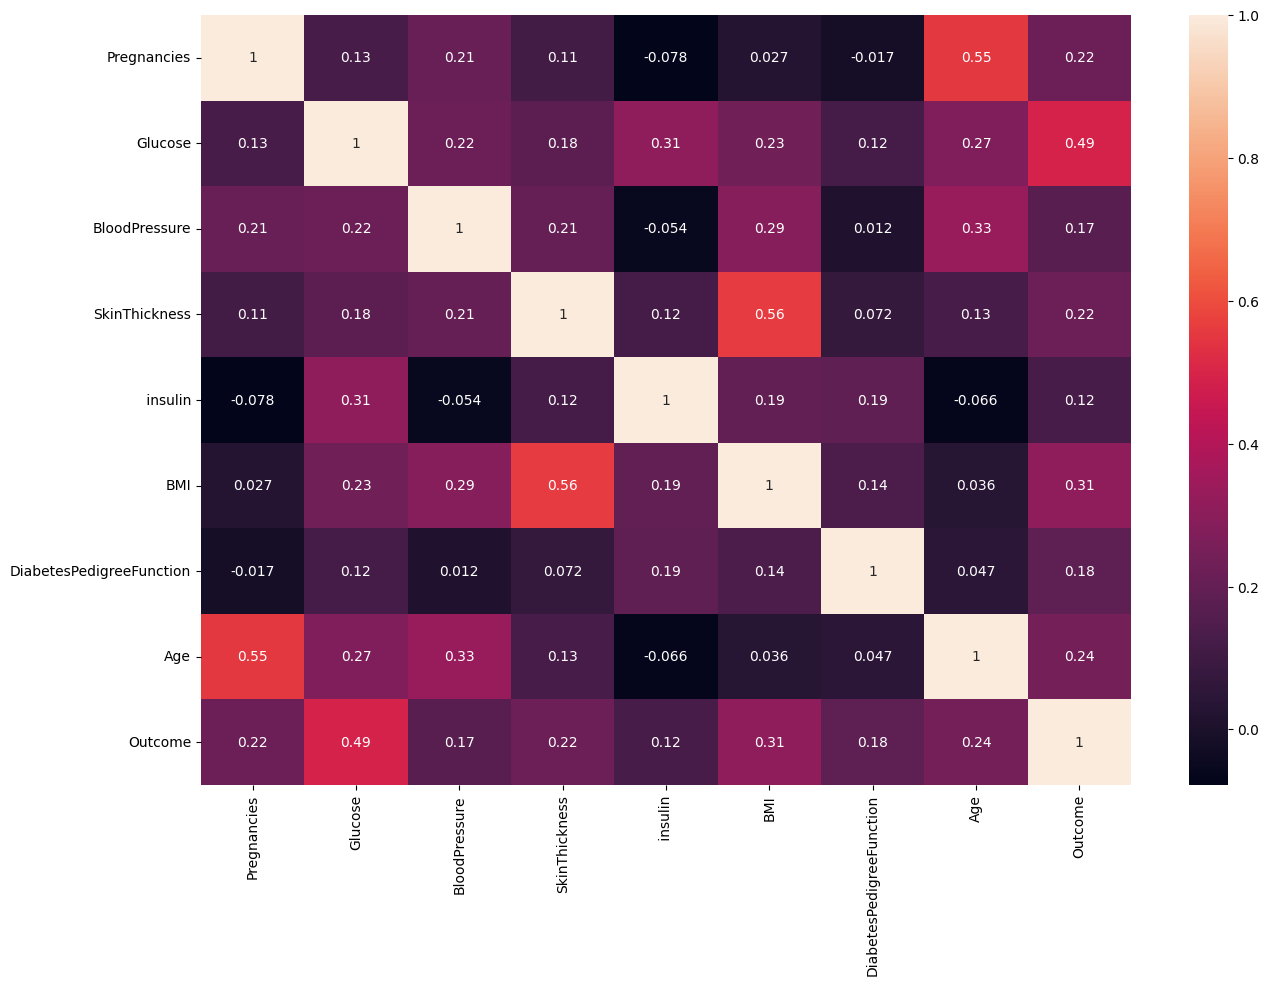

In [ ]:
# analysing correlation for cleaned data
sns.heatmap(df.corr(),annot = True)
plt.rcParams['figure.figsize'] = (10,5)
plt.show()


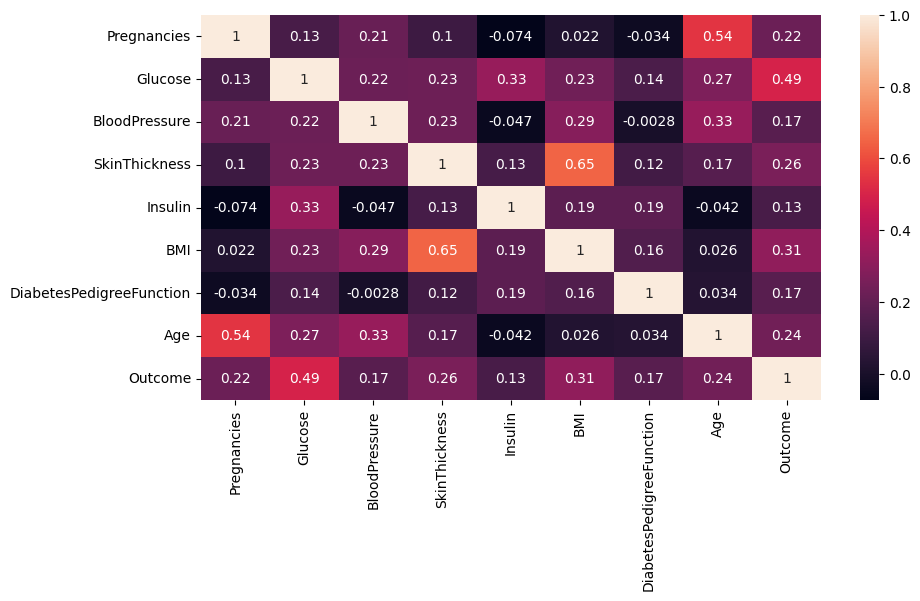

In [ ]:
# correlation for uncleaned data
sns.heatmap(data.corr(),annot = True)
plt.rcParams['figure.figsize'] = (10,5)
plt.show()

From EDA we can able to understand that Cleaned data have high Correlation than Uncleaned data

**SCALING**

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.00000,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.0,43.1,1.200,33.0,1.0


In [ ]:
#Scaling
sc_x= StandardScaler()
X =  pd.DataFrame(sc_x.fit_transform(df.drop(["Outcome"],axis = 1)),columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
 #X = sc_x.fit_transform(df.drop(["Outcome"],axis = 1),columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction','Age'])

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.647150,0.865108,-0.032212,0.818444,-0.787602,0.180754,0.588927,1.445691
1,-0.848970,-1.206162,-0.545506,0.011846,-0.787602,-0.869804,-0.378101,-0.189304
2,1.245598,2.015813,-0.716604,0.032470,-0.787602,-1.365068,0.746595,-0.103252
3,-0.848970,-1.074652,-0.545506,-0.794752,0.217583,-0.644685,-1.022787,-1.049828
4,-1.148194,0.503458,-2.769778,0.818444,1.008900,1.606512,2.596563,-0.017199


In [ ]:
Y = df['Outcome']

**SPLITTING THE DATA**

In [ ]:
# train test split

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


**MODEL BUILDING**

In [ ]:
#Logistic Regression
Log_reg = LogisticRegression()
Log_reg.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
Log_reg.score(X_train,Y_train)

0.7768729641693811

In [ ]:
Log_reg.score(X_test, Y_test)

0.7857142857142857

In [ ]:
Y_pred = Log_reg.predict(X_test)

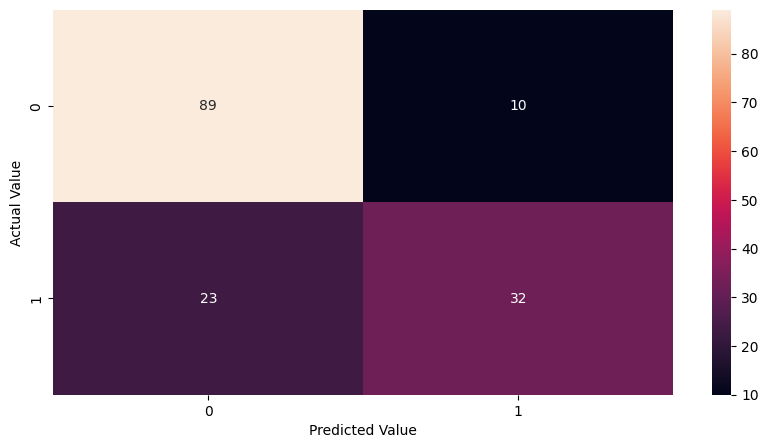

In [ ]:
# Confusion Matrix
cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot = True,)
plt.rcParams['figure.figsize'] = (8,5)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [ ]:
print("Logistic Regression : \n" , classification_report(Y_test, Y_pred))

Logistic Regression : 
               precision    recall  f1-score   support

         0.0       0.79      0.90      0.84        99
         1.0       0.76      0.58      0.66        55

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154



**Accuracy for Logistice Regression : 79**

In [ ]:
# Decision Tree Algorithm
Dec_tr = DecisionTreeClassifier()
Dec_tr.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
Dec_tr.score(X_train,Y_train)

1.0

In [ ]:
Dec_tr.score(X_test, Y_test)

0.6883116883116883

In [ ]:
Y_Pred = Dec_tr.predict(X_test)

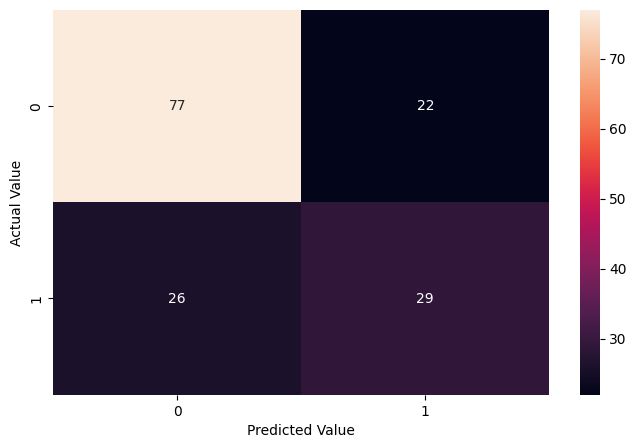

In [ ]:
# Confusion Matrix
cm = confusion_matrix(Y_test,Y_Pred)
sns.heatmap(cm,annot = True,)
plt.rcParams['figure.figsize'] = (8,5)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [ ]:
print('Decision Tree Classifier: \n', classification_report(Y_test,Y_Pred))

Decision Tree Classifier: 
               precision    recall  f1-score   support

         0.0       0.75      0.78      0.76        99
         1.0       0.57      0.53      0.55        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.68      0.69      0.69       154



**Decision Tree Classifier accuracy : 69**